In [2]:
import tensorflow as tf
import numpy as np
import os

%load_ext autoreload
%autoreload 2

# Import the library to mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
FOLDERNAME = 'DL project/fma'
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME/

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Mounted at /content/drive
/content/drive/My Drive/DL project/fma


In [3]:
import tensorflow as tf
import numpy as np
import os


dataset_dir = "data/raw_small/"

# Function to load a single .npy file and assign its label
def load_npy_file(file_path, label):
    # Read the file and decode its path
    npy = tf.numpy_function(lambda path: np.load(path).astype(np.float32), [file_path], tf.float32)
    npy.set_shape([10000,])  # Set shape (update according to your spectrogram's dimensions)

    return npy, label


# Function to create a dataset for all files
def create_dataset(dataset_dir):
    # List all files and infer labels from folder names
    all_files = []
    all_labels = []
    for class_name in sorted(os.listdir(dataset_dir)):
        class_path = os.path.join(dataset_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        label = ([int(digit) for digit in class_name])  # Convert folder name to integer label
        files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith(".npy")]
        all_files.extend(files)
        all_labels.extend([label] * len(files))

    print(len(all_labels))
    print(len(all_files))



    # Create a dataset from the files and labels
    file_paths = tf.constant(all_files)
    labels = tf.constant(all_labels, dtype=tf.int32)
    num_classes = 8  # Determine the number of classes
    # labels = tf.one_hot(labels, depth=num_classes)  # Apply one-hot encoding
    # print(labels)

    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    # dataset = dataset.shuffle(len(all_files))  # Shuffle dataset
    dataset = dataset.map(load_npy_file, num_parallel_calls=tf.data.AUTOTUNE)  # Load files
    batch_size = 64
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset, all_labels


# Create the train dataset
test_dataset, test_labels = create_dataset(dataset_dir+"test")

# Inspect a sample
# for spectrogram, label in test_dataset.take(1):
#     print("Spectrogram shape:", spectrogram.shape)
#     print("Label:", label.shape)
#     num_classes = label.shape[1]



781
781


In [4]:
import tensorflow as tf
import numpy as np
import os


dataset_dir = "data/spec_small2/"

# Function to load a single .npy file and assign its label
def load_npy_file(file_path, label):
    # Read the file and decode its path
    npy = tf.numpy_function(lambda path: np.load(path).astype(np.float32), [file_path], tf.float32)
    npy.set_shape([128, 12])  # Set shape (update according to your spectrogram's dimensions)

    return npy, label


# Function to create a dataset for all files
def create_dataset(dataset_dir):
    # List all files and infer labels from folder names
    all_files = []
    all_labels = []
    for class_name in sorted(os.listdir(dataset_dir)):
        class_path = os.path.join(dataset_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        label = ([int(digit) for digit in class_name])  # Convert folder name to integer label
        files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith(".npy")]
        all_files.extend(files)
        all_labels.extend([label] * len(files))

    print(len(all_labels))
    print(len(all_files))



    # Create a dataset from the files and labels
    file_paths = tf.constant(all_files)
    labels = tf.constant(all_labels, dtype=tf.int32)
    num_classes = 8  # Determine the number of classes
    # labels = tf.one_hot(labels, depth=num_classes)  # Apply one-hot encoding
    # print(labels)

    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    # dataset = dataset.shuffle(len(all_files))  # Shuffle dataset
    dataset = dataset.map(load_npy_file, num_parallel_calls=tf.data.AUTOTUNE)  # Load files
    batch_size = 64
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset, all_labels


# Create the train dataset
test_dataset, test_labels = create_dataset(dataset_dir+"test")

# Inspect a sample
# for spectrogram, label in test_dataset.take(1):
#     print("Spectrogram shape:", spectrogram.shape)
#     print("Label:", label.shape)
#     num_classes = label.shape[1]



800
800


In [5]:
import tensorflow.keras as keras

model_paths = [
    # 'final_models/best_small_resnet_model2.keras',
    # 'final_models/best_small_crnn_model2.keras',
    # 'final_models/best_small_clstm_model02.keras',
    'best_small__model.keras',
]

raw_preds = []
for path in model_paths:
    model = keras.models.load_model(path)
    preds = model.predict(test_dataset)
    raw_preds.append(preds)

ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 10000), found shape=(64, 128, 12)

In [ ]:
for raw_pred in raw_preds:
    pred_labels = np.argmax(raw_pred, axis=1)
    true_labels = np.argmax(test_labels, axis=1)

    print(np.sum(pred_labels == true_labels)/800)
    correct = [0]*8
    for i in range(800):
        if pred_labels[i] == true_labels[i]:
            correct[true_labels[i]] +=1


    print([c/100 for c in correct])



#     0.3025
# [0.26, 0.09, 0.31, 0.63, 0.16, 0.29, 0.11, 0.57]
# 0.28625
# [0.31, 0.29, 0.31, 0.42, 0.19, 0.29, 0.01, 0.47]
# 0.27125
# [0.03, 0.15, 0.37, 0.79, 0.17, 0.19, 0.01, 0.46]
# 0.2925
# [0.23, 0.22, 0.16, 0.66, 0.14, 0.35, 0.07, 0.51]





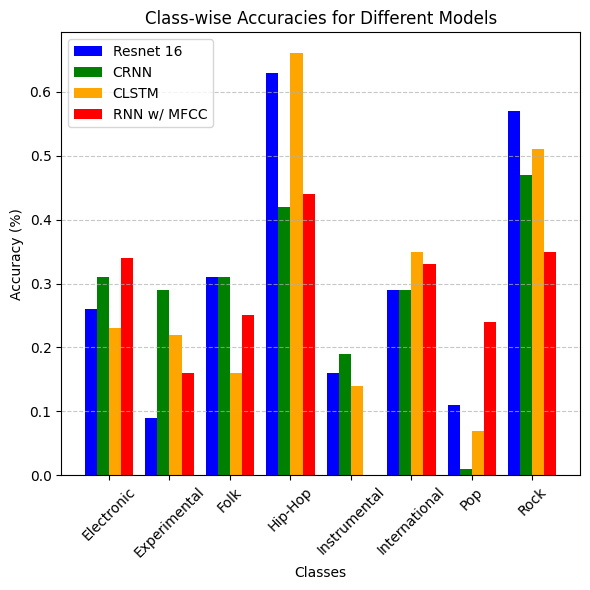

[0.34, 0.16, 0.25, 0.44, 0.0, 0.33, 0.24, 0.35]

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
classes = ['Electronic', 'Experimental','Folk','Hip-Hop', 'Instrumental','International','Pop','Rock'
 ]  # Class names
model_accuracies = {
    'Resnet 16': [0.26, 0.09, 0.31, 0.63, 0.16, 0.29, 0.11, 0.57],
    'CRNN': [0.31, 0.29, 0.31, 0.42, 0.19, 0.29, 0.01, 0.47],
    'CLSTM': [0.23, 0.22, 0.16, 0.66, 0.14, 0.35, 0.07, 0.51],
    'RNN w/ MFCC': [0.34, 0.16, 0.25, 0.44, 0.0, 0.33, 0.24, 0.35],
}

# Bar plot settings
x = np.arange(len(classes))  # Positions for groups
bar_width = 0.2  # Width of each bar
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(6, 6))

# Plot bars for each model
for i, (model, accuracies) in enumerate(model_accuracies.items()):
    plt.bar(x + i * bar_width, accuracies, bar_width, label=model, color=colors[i])

# Formatting
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracies for Different Models')
plt.xticks(x + bar_width * 1.5, classes, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



[0.26, 0.09, 0.31, 0.63, 0.16, 0.29, 0.11, 0.57]
[0.31, 0.29, 0.31, 0.42, 0.19, 0.29, 0.01, 0.47]
[0.23, 0.22, 0.16, 0.66, 0.14, 0.35, 0.07, 0.51]
[0.34, 0.16, 0.25, 0.44, 0.0, 0.33, 0.24, 0.35]